In [145]:
!pip install tweepy
!pip install textblob
!pip install wordcloud
!pip install pandas 
!pip install numpy
!pip install matplotlib
!pip install deep-translator

In [1]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import emoji
import time
import itertools
from datetime import datetime
from datetime import timedelta
plt.style.use('fivethirtyeight')

In [202]:
# consumerKey = 'R3pYUkdYUnZGeDBLdHo2VFUxWHA6MTpjaQ'
# consumerSecret = '8USvij_3W0tKS1201nTdRxoim4Pu386PAJqQhrgiBQF_HcTJfx'
# accessToken = '3127866623-ZhqbfL0I1xm9hX7niWk03qRc8QhxsDSvFKQjLl6'
# accessTokenSecret = 'f4BYkSpbKFCXBy0keCngs0nqHMRdDFLjslBlvA5luga1D'

In [14]:
client = tweepy.Client("AAAAAAAAAAAAAAAAAAAAAA1jcgEAAAAAFc%2FWLI%2B6XPqEPwbRaVpBBT8anOQ%3DG2XCHIKgLGPjW6W93vz0g7TU3PzNoud62PibsBVkMIvqD7VYSD")

posts = []
for i in range(2):
    response = client.search_recent_tweets('Bolsonaro', max_results=100)
    posts.append(response.data)
    time.sleep(1)
    
i = 1
for tweet in posts[0][0:5]:
    print(str(i) + ') ' + tweet.text + '\n')
    i += 1

posts = itertools.chain.from_iterable(posts)
posts = list(dict.fromkeys(posts))

1) RT @umvicente: isso foi meio bolsonaro da sua parte

2) @odairsbtista @bielvaquer fora o fato de também ser um VAGABUNDO desocupado igual a todos vocês 

https://t.co/abGI77SCLz

3) RT @Fiuzafirmao2: Você irá VOTAR em Jair Bolsonaro em que Estado?

4) RT @Rconstantino: Bolsonaro está dando ao Supremo o que o PSDB está oferecendo a Doria: uma oportunidade para uma saída aparentemente digna…

5) RT @Claudinnei1: Quem aí tbm acha. Segue que Sigo de volta...TMJ
Robozada🇧🇷🇧🇷🇧🇷
Bolsonaro 22 1°turno https://t.co/R42JGWRI0x



In [8]:
df = pd.DataFrame([tweet.text for tweet in posts], columns =['Tweets'])

def cleanTxt(text):
    text = re.sub('@[A-Za-z0-9]+',' ',text) # Removed @ mentions
    text = re.sub(r'#',' ',text) # Removing the '#' symbol
    text = re.sub(r'RT[\s]+',' ',text) # Removing RT
    text = re.sub(r'https?:\/\/\S+',' ',text) # Remove the hyper link 
    text = re.sub(r'_:',' ',text) 
    text = re.sub(r'\n',' ',text) 
    text = re.sub(r':',' ',text) 
    text = re.sub(r'_',' ',text)
    return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', text)

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df['Tweets'] = df['Tweets'].apply(remove_emoji)
df

,Tweets
0,Con (fleury) habló casi todos los días.
1,Huddy Fleury no call. 1991 Smythe Final ...
2,Cuando yo vaya a RD tenemos que ir. apunta...
3,Vient de publier une photo à Fleury (Moselle)
4,Marc-Andre Fleury is signing with the Columb...
...,...
95,"""We'll deal with it."" MNWild will try to r..."
96,Vereador Leandro Sena fazendo uma veemente def...
97,"Segundo estudo do laboratório Fleury, 98,9%..."
98,"Segundo estudo do laboratório Fleury, 98,9%..."


In [37]:
from deep_translator import GoogleTranslator

translated = []
for i in range(len(df)):
    text = GoogleTranslator(source='pt', target='en').translate(df['Tweets'][i])
    translated.append(text)
    
df2 = pd.DataFrame(translated, columns =['Tweets'])
df2

,Tweets
0,101 Exactly He went to write the letter to Bol...
1,My grandmother is an evangelical lady with lit...
2,hypothesis the next research will bring anothe...
3,Bolsonaro makes a fool of voters. Not every vo...
4,The members of the STF already know that they ...
...,...
995,"As an artist, I've done more than 3,000 perfor..."
996,"Just to remind you 16 days ago, Bolsonaro redu..."
997,Sunday lunch badmouthing bolsonaro = perfect
998,"It's that... ""ah but if you vote Nulo you're L..."


In [38]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df2['Subjectivity'] = df2['Tweets'].apply(getSubjectivity)
df2['Polarity'] = df2['Tweets'].apply(getPolarity)
df2[34:42]

,Tweets,Subjectivity,Polarity
34,JPURGENT | President Jair Bolsonaro (PL) speak...,0.500000,0.136364
35,Lol lol L for thief... the biggest in Brazil ....,0.666667,0.400000
36,"Good morning, loves of my heart!!! Anyone else...",0.600000,1.000000
37,"BOLSONARO DETONA LULA ""See if Lula goes out on...",0.900000,0.700000
38,Now she wants to be a senator and says she has...,0.100000,0.200000
39,Bolsonaro says Sachsida has carte blanche to m...,0.000000,0.000000
40,"If Bolsonaro doesn't win, Bolsonaro will win a...",0.400000,0.800000
41,WendellMaia Meet the portrait of the people wh...,0.600000,0.625000


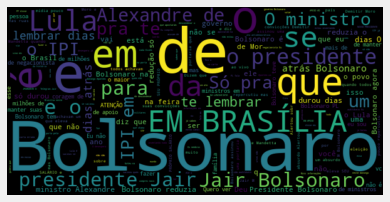

In [39]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 600, height = 300, random_state = 21,max_font_size = 119).generate(allWords)

plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [40]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df2['Analysis'] = df2['Polarity'].apply(getAnalysis)
df2

,Tweets,Subjectivity,Polarity,Analysis
0,101 Exactly He went to write the letter to Bol...,0.250000,0.250000,Positive
1,My grandmother is an evangelical lady with lit...,0.600000,0.104167,Positive
2,hypothesis the next research will bring anothe...,0.000000,0.000000,Neutral
3,Bolsonaro makes a fool of voters. Not every vo...,0.000000,0.000000,Neutral
4,The members of the STF already know that they ...,0.900000,-0.500000,Negative
...,...,...,...,...
995,"As an artist, I've done more than 3,000 perfor...",0.500000,0.500000,Positive
996,"Just to remind you 16 days ago, Bolsonaro redu...",1.000000,0.000000,Neutral
997,Sunday lunch badmouthing bolsonaro = perfect,1.000000,1.000000,Positive
998,"It's that... ""ah but if you vote Nulo you're L...",0.433333,0.466667,Positive


In [48]:
j = 1
sortedDF = df2.sort_values(by=['Polarity'])
for i in range(50):
    if(sortedDF['Analysis'][i]== 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweets'][i] + '\n')
        j += 1

1) The members of the STF already know that they bet on the wrong card to decondemn Lula. Despair has already knocked on the door, by…

2) Bolsonaro rides a motorcycle through Brasilia and hears 'turn down the gas, president'

3) Rede Globo, Bandeirantes, Record, SBT, Jovem Pan, CNN. Sorry. You look for news on Bolsonaro's children. Doesn't Lula have children? Are they saints? Is this Independent Journalism? Hypocrites. The only state-owned company that lost money was Globo, which sweeps to one side only. PHARISEES

4) Without citing Daniel Silveira, president made indirect criticism of STF ministers 'You have to be sorry and not want to arrest'

5) Even the Pedalboard failed! WITHOUT FRAUD, President Bolsonaro takes the FIRST ROUND, with more than 80% of votes.

6) Bolsonaro had the courage to stand by his convictions. Fire Moro and Mandetta, when everyone thought it was absurd. Warned about…

7) YOU'RE WRONG! Bols0miT0 didn't spend BRL 1 million in a month, he spent BRL 4.2 million! 

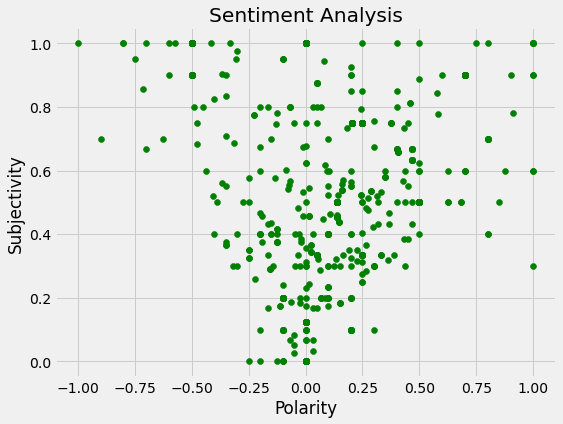

In [42]:
plt.figure(figsize=(8,6))

for i in range(0,df.shape[0]):
    plt.scatter(df2['Polarity'][i], df2['Subjectivity'][i], color = 'Green')
                                      
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [13]:
df.shape[2]

IndexError: tuple index out of range

In [43]:
ptweets = df2[df2.Analysis == 'Positive']
ptweets = ptweets['Tweets']

print('Positive: ', round((ptweets.shape[0]/df.shape[0])*100,1))

ptweets = df2[df2.Analysis == 'Neutral']
ptweets = ptweets['Tweets']

print('Neutral: ', round((ptweets.shape[0]/df.shape[0])*100,1))

ptweets = df2[df2.Analysis == 'Negative']
ptweets = ptweets['Tweets']

print('Negative: ', round((ptweets.shape[0]/df.shape[0])*100,1))

Positive:  38.7
Neutral:  43.5
Negative:  17.8


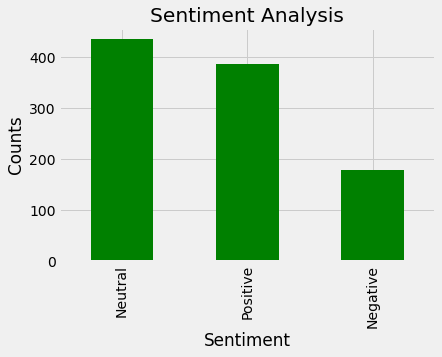

In [44]:
df2['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df2['Analysis'].value_counts().plot(kind='bar', color = 'Green')
plt.show()